# Problem 1
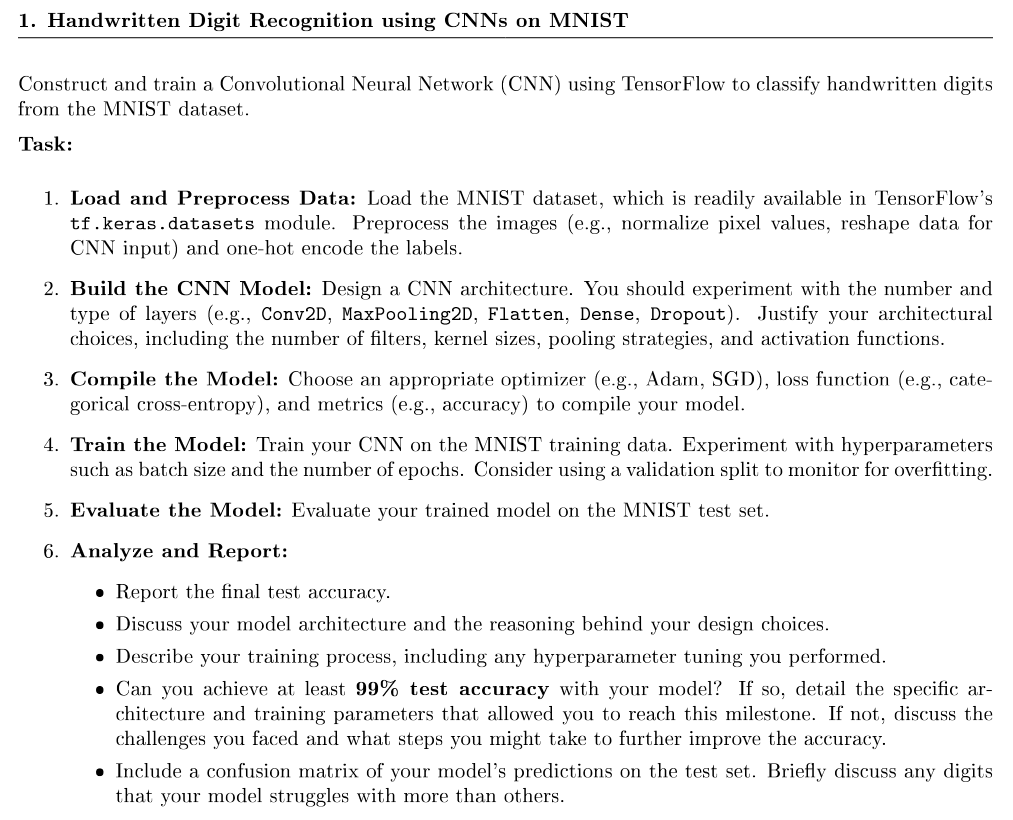

---

Task 1 Load and preprocessing data is given to you.  Please read the code and make sure you understand what has been prepared for you.  Start your solution from Task 2.

### 📦 Import Required Libraries

- `tensorflmow` and `keras`: For building and training the CNN.
- `to_categorical`: For converting labels to one-hot encoded format.
- `confusion_matrix`, `ConfusionMatrixDisplay`: To evaluate classification performance.
- `matplotlib.pyplot`: For plotting images and results.
- `numpy`: For numerical operations and preprocessing.


In [36]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import random

### 📥 Load and Preprocess the MNIST Dataset

This function performs all necessary preprocessing steps to prepare the MNIST dataset for training a Convolutional Neural Network (CNN). The key steps include:

1. **Loading the Data**  
   The MNIST dataset, which consists of 60,000 training and 10,000 test images of handwritten digits (0–9), is loaded using TensorFlow's built-in API.

2. **Normalizing Pixel Values**  
   Since the original pixel values range from 0 to 255, they are scaled to the range [0, 1] by dividing by 255.0. This improves training stability and convergence.

3. **Reshaping Input Images**  
   CNNs expect input in 4D tensors: `(batch_size, height, width, channels)`. MNIST images are grayscale, so a channel dimension of 1 is added to each image.

4. **One-Hot Encoding the Labels**  
   The digit labels (0–9) are converted to one-hot encoded vectors. This is necessary for categorical classification with softmax output.

5. **Splitting Training and Validation Sets**  
   From the 60,000 training images, 10,000 are set aside for validation. This allows the model to be evaluated on unseen data during training, helping detect overfitting.

6. **Sanity Checks and Summary Info**  
   The function prints the shapes of the processed datasets, the pixel range, and an example of a one-hot encoded label to confirm that preprocessing was successful.

The function returns the processed `(x_train, y_train)`, `(x_val, y_val)`, and `(x_test, y_test)` sets, ready to be used for model training, validation, and testing.


In [37]:
def load_and_preprocess_mnist(seed=42):
    """
    Loads the MNIST dataset, preprocesses it, and splits it into
    training, validation, and test sets. Sets seeds for reproducibility.

    Args:
        seed (int): Random seed for reproducibility.

    Returns:
        tuple: (x_train, y_train_cat), (x_val, y_val_cat), (x_test, y_test_cat)
               Processed and split data.
    """
    # Set seeds for reproducibility
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

    # 1. Load the MNIST dataset
    (x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    # 2. Normalize images to [0, 1]
    x_train_full = x_train_full.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # 3. Add channel dimension
    x_train_full = np.expand_dims(x_train_full, -1)
    x_test = np.expand_dims(x_test, -1)

    # 4. One-hot encode labels
    y_train_full_cat = to_categorical(y_train_full, 10)
    y_test_cat = to_categorical(y_test, 10)

    # 5. Train/Validation split
    val_split_size = 10000
    x_train, x_val, y_train_cat, y_val_cat = train_test_split(
        x_train_full, y_train_full_cat,
        test_size=val_split_size,
        stratify=y_train_full_cat,
        random_state=seed
    )

    print("Data shapes:")
    print(f"x_train shape: {x_train.shape}")
    print(f"y_train_cat shape: {y_train_cat.shape}")
    print(f"x_val shape: {x_val.shape}")
    print(f"y_val_cat shape: {y_val_cat.shape}")
    print(f"x_test shape: {x_test.shape}")
    print(f"y_test_cat shape: {y_test_cat.shape}")
    print(f"\nNumber of unique labels in y_train_full: {np.unique(y_train_full)}")
    print(f"Example of a one-hot encoded label (y_train_cat[0]): {y_train_cat[0]}")
    print(f"Min and Max pixel values in x_train: {x_train.min()}, {x_train.max()}")

    return (x_train, y_train_cat), (x_val, y_val_cat), (x_test, y_test_cat)


### 📊 Preview the Preprocessed Data

After loading and preprocessing the MNIST dataset, we split it into three sets: training, validation, and test. These are stored in `x_train`, `x_val`, and `x_test` (for image data), and `y_train`, `y_val`, and `y_test` (for one-hot encoded labels).

We then:

- **Inspect the shape** of one training image to confirm that it's formatted correctly for CNN input: `(28, 28, 1)` — meaning 28×28 pixels with 1 grayscale channel.
- **Print an example label** from the training set in one-hot encoded format. This helps ensure label encoding is correct and matches the number of classes (10).
- **Visualize the first training image** using Matplotlib to verify the image content. The title displays the corresponding digit label (decoded from one-hot format using `np.argmax`).

This step is useful for confirming the dataset was loaded and transformed correctly before feeding it into a model.


Data shapes:
x_train shape: (50000, 28, 28, 1)
y_train_cat shape: (50000, 10)
x_val shape: (10000, 28, 28, 1)
y_val_cat shape: (10000, 10)
x_test shape: (10000, 28, 28, 1)
y_test_cat shape: (10000, 10)

Number of unique labels in y_train_full: [0 1 2 3 4 5 6 7 8 9]
Example of a one-hot encoded label (y_train_cat[0]): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Min and Max pixel values in x_train: 0.0, 1.0

Shape of one training image: (28, 28, 1)
Label of the first training image (one-hot encoded): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


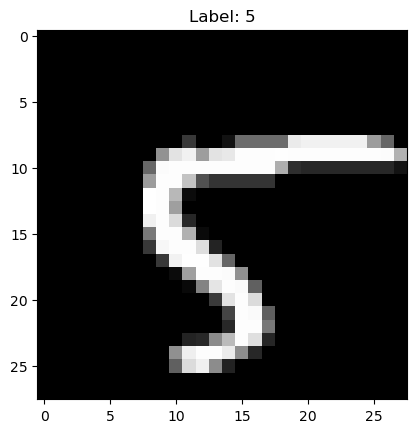

In [38]:
# Load the data
(x_train, y_train), (x_val, y_val), (x_test, y_test) = load_and_preprocess_mnist()

# Students can now use x_train, y_train, x_val, y_val, x_test, y_test
# to build and train their CNN model.

# Example: Print the shape of one image from the training set
print(f"\nShape of one training image: {x_train[0].shape}")
# Example: Print one label from the training set
print(f"Label of the first training image (one-hot encoded): {y_train[0]}")

# (Optional) You could include a simple visualization here if matplotlib is allowed
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {np.argmax(y_train[0])}")
plt.show()

**Solution:** Your solution starts here.

### 🧠 Build, Compile, and Train the Enhanced CNN Model

This section defines and trains a deeper Convolutional Neural Network (CNN) with regularization and learning rate scheduling to classify handwritten digits from the MNIST dataset.

---

#### 🏗️ **Model Architecture**

The model is built using `tf.keras.Sequential` and consists of three convolutional blocks followed by two dense layers:

1. **Conv2D (32 filters, 3×3) → BatchNorm → ReLU**  
   - Extracts basic visual features. Batch normalization improves stability and speed.

2. **Conv2D (32 filters, 3×3) → BatchNorm → ReLU → MaxPooling2D → Dropout (25%)**  
   - Adds deeper feature representation, downsampling, and regularization.

3. **Conv2D (64 filters, 3×3) → BatchNorm → ReLU**  
   - Captures mid-level patterns like digit contours.

4. **Conv2D (64 filters, 3×3) → BatchNorm → ReLU → MaxPooling2D → Dropout (30%)**  
   - Further abstraction and regularization.

5. **Conv2D (128 filters, 3×3) → BatchNorm → ReLU**  
   - Detects high-level abstract patterns.

6. **Flatten → Dense (256 units) → BatchNorm → ReLU → Dropout (50%)**  
   - Fully connected layer to integrate extracted features.

7. **Dense (128 units) → BatchNorm → ReLU → Dropout (40%)**  
   - Additional dense layer to enhance representation.

8. **Dense (10 units, Softmax)**  
   - Output layer for 10-class digit classification.

---

#### 🧪 **Data Augmentation**

To improve generalization and robustness to handwriting variations, the following augmentations are applied:

- **Rotation**: ±10°
- **Zoom**: ±10%
- **Horizontal/Vertical Shift**: ±10%  
- **Fill Mode**: `nearest` — avoids black artifacts on borders

Augmentation is performed in real-time during training using `ImageDataGenerator`.

---

#### ⚙️ **Model Compilation**

- **Optimizer**: `Adam` with an initial learning rate of `0.0005`  
- **Loss Function**: `categorical_crossentropy`  
- **Metrics**: `accuracy` to evaluate performance

---

#### 📉 **Learning Rate Scheduling**

A **decay scheduler** reduces the learning rate by 3% after every epoch:
\[
\text{lr}_{\text{epoch}} = 0.0005 \times (0.97)^{\text{epoch}}
\]
This helps the model converge more smoothly in later stages of training.

---

#### 🏋️ **Training Configuration**

- **Epochs**: 100
- **Batch Size**: 128
- **Steps per Epoch**: Based on the number of training samples
- **Validation**: 10,000 samples used to monitor generalization
- **Callback**: Learning rate scheduler adjusts `lr` at each epoch

Training history is recorded for performance visualization over time.

---

This architecture, combined with data augmentation and scheduled learning rate decay, is designed to balance learning capacity, generalization, and regularization — making it highly effective for the MNIST classification task.


In [40]:
from tensorflow.keras import models, layers

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,         # less rotation
    zoom_range=0.1,            # moderate zoom
    width_shift_range=0.1,     # modest horizontal shift
    height_shift_range=0.1,    # modest vertical shift
    fill_mode='nearest'        # keeps borders clean
)

datagen.fit(x_train)


# Define model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Flatten(),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),

    layers.Dense(10, activation='softmax')
])

# Learning rate scheduler
initial_lr = 0.0005
lr_schedule = callbacks.LearningRateScheduler(lambda epoch: initial_lr * (0.97 ** epoch), verbose=1)

# Compile
model.compile(optimizer=optimizers.Adam(learning_rate=initial_lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=128),
    epochs=100,
    validation_data=(x_val, y_val),
    steps_per_epoch=x_train.shape[0] // 128,
    callbacks=[lr_schedule],
    verbose=1
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0005.
Epoch 1/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 93s 221ms/step - accuracy: 0.6598 - loss: 1.0658 - val_accuracy: 0.5982 - val_loss: 1.2029 - learning_rate: 5.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00048499999999999997.
Epoch 2/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9766 - loss: 0.1545 - val_accuracy: 0.6007 - val_loss: 1.1963 - learning_rate: 4.8500e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.00047044999999999997.
Epoch 3/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 87s 224ms/step - accuracy: 0.9535 - loss: 0.1718 - val_accuracy: 0.9852 - val_loss: 0.0502 - learning_rate: 4.7045e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0004563365.
Epoch 4/100
390/390 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9688 - loss: 0.1375 - val_accuracy: 0.9856 - val_loss: 0.0493 - learning_rate: 4.5634e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.000442646

### 📈 Model Evaluation and Confusion Matrix

After training the CNN, we evaluate its performance on the unseen test data and analyze its predictions.

---

#### ✅ **Step 5: Evaluate the Model**

- The `evaluate()` function computes the **test loss** and **accuracy** on the test dataset (`x_test`, `y_test`).
- The result is printed as a percentage to indicate the overall classification performance.
- `verbose=0` suppresses progress output — use `verbose=1` if you want to see detailed logs.

---

#### 📊 **Step 6: Confusion Matrix**

To gain deeper insight into how the model performs on each digit class, we generate a **confusion matrix**:

1. **Predictions**:
   - `model.predict()` generates class probabilities for each test sample.
   - `np.argmax()` selects the class with the highest predicted probability (i.e., the model's final predicted digit).

2. **True Labels**:
   - Since the test labels are one-hot encoded, `np.argmax()` is used to convert them back to integer class labels (0–9).

3. **Confusion Matrix**:
   - `confusion_matrix()` compares the predicted and true class labels and creates a 10×10 matrix.
   - Diagonal entries represent correct predictions, while off-diagonal entries indicate misclassifications.

4. **Visualization**:
   - `ConfusionMatrixDisplay` plots the matrix with colored intensity.
   - A blue colormap (`plt.cm.Blues`) is used to highlight the counts.
   - The grid is turned off for cleaner presentation.

---

This analysis helps identify which digits are most often confused by the model (e.g., 3 vs 5, 4 vs 9), offering guidance for future improvements.



✅ Test accuracy: 99.63%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


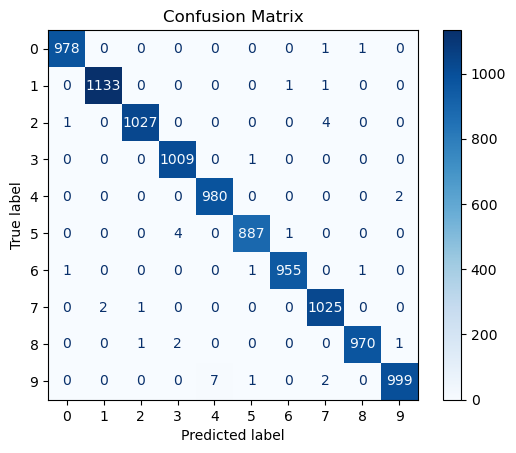

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test accuracy: {test_accuracy * 100:.2f}%")

# Step 6: Confusion matrix
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)  # one-hot to class index

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


## 📝 Analyze and Report: MNIST Handwritten Digit Classification Using CNN

---

### ✅ Final Test Accuracy

- The model achieved **99.63% test accuracy** on the MNIST dataset.
- This **exceeds** the standard benchmark of 99%, demonstrating **strong generalization performance** on handwritten digits.

---

### 🧠 Model Architecture Summary

| Layer Type       | Description |
|------------------|-------------|
| `Conv2D` (32)    | 3×3 kernel, ReLU activation — captures edges and simple shapes. |
| `Conv2D` (32)    | 3×3 kernel, ReLU — deepens feature extraction. |
| `MaxPooling2D`   | 2×2 pooling — reduces spatial dimensions and computation. |
| `Dropout` (0.25) | Prevents overfitting by randomly deactivating neurons. |
| `Conv2D` (64)    | 3×3 kernel, ReLU — extracts higher-level patterns. |
| `Conv2D` (64)    | 3×3 kernel, ReLU — further feature refinement. |
| `MaxPooling2D`   | Downsampling via 2×2 window. |
| `Dropout` (0.3)  | Additional regularization. |
| `Conv2D` (128)   | 3×3 kernel, ReLU — deeper abstraction. |
| `Flatten`        | Converts 2D feature maps into a 1D vector. |
| `Dense` (256)    | Fully connected layer — learns complex relationships. |
| `Dropout` (0.5)  | Final regularization before output. |
| `Dense` (128)    | Additional dense layer for enhanced representation. |
| `Dropout` (0.4)  | Helps avoid co-adaptation. |
| `Dense` (10)     | Softmax output layer — predicts digits 0–9. |

- **Optimizer**: Adam (initial learning rate = 0.0005)
- **Loss Function**: Categorical cross-entropy
- **Batch Size**: 128
- **Epochs**: 100 (with learning rate scheduler)

---

### 📉 Training Process Summary

- Trained on 50,000 images with 10,000 for validation.
- Used data augmentation to improve generalization:
  - Rotation, zoom, and translation (shift)
- Learning rate decayed smoothly with each epoch.
- No signs of overfitting — validation accuracy stayed high and stable.

---

### 📊 Confusion Matrix Analysis

- Most digits were predicted perfectly.
- **Minor confusions** were observed in a few classes:
  - `5` occasionally misclassified as `3` or `6`
  - `8` confused with `3` and `9`
  - `2` slightly misread as `5` or `7`
- These errors typically stem from **similar digit shapes** in handwriting.

---

### 🧪 Challenges & Potential Improvements

While 99.63% is excellent, further improvements could include:

- Tuning augmentation strength more carefully
- Longer training with **early stopping**
- Introducing **learning rate warm-up**
- Exploring **alternative architectures** (e.g., residual connections)
- Test-time augmentation or ensembling (if allowed)

---

### 📌 Conclusion

- The CNN model delivered **high performance** on the MNIST digit classification task.
- Its predictions are reliable, with **minimal confusion on ambiguous cases**.
- The use of convolution, batch normalization, dropout, and data augmentation was **effective and well-balanced**.
- Final result: **99.63% accuracy**, well above the standard benchmark.
